# 1. Prepare Problem

## a) Load libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

## b) Load dataset

### Download "Cyber-security-breaches" dataset from kaggle website.You can the dataset by this link: https://www.kaggle.com/code/sumayaaltamimi/cyber-security-breaches/notebook

In [8]:
df = pd.read_csv("Cyber_Security_Breaches.csv")
df

,Unnamed: 0,Number,Name_of_Covered_Entity,State,Business_Associate_Involved,Individuals_Affected,Date_of_Breach,Type_of_Breach,Location_of_Breached_Information,Date_Posted_or_Updated,Summary,breach_start,breach_end,year
0,1,0,Brooke Army Medical Center,TX,NaN,1000,10/16/2009,Theft,Paper,2014-06-30,A binder containing the protected health infor...,2009-10-16,NaN,2009
1,2,1,"Mid America Kidney Stone Association, LLC",MO,NaN,1000,9/22/2009,Theft,Network Server,2014-05-30,Five desktop computers containing unencrypted ...,2009-09-22,NaN,2009
2,3,2,Alaska Department of Health and Social Services,AK,NaN,501,10/12/2009,Theft,"Other Portable Electronic Device, Other",2014-01-23,NaN,2009-10-12,NaN,2009
3,4,3,Health Services for Children with Special Need...,DC,NaN,3800,10/9/2009,Loss,Laptop,2014-01-23,A laptop was lost by an employee while in tran...,2009-10-09,NaN,2009
4,5,4,"L. Douglas Carlson, M.D.",CA,NaN,5257,9/27/2009,Theft,Desktop Computer,2014-01-23,A shared Computer that was used for backup was...,2009-09-27,NaN,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,1051,1050,Puerto Rico Health Insurance,PR,American Health Inc,28413,9/20/2013,Theft,Other,2014-06-27,NaN,2013-09-20,NaN,2013
1051,1052,1051,"Hospitalists of Brandon, LLC",FL,"Doctors First Choice Billings, Inc.",1831,2/11/2014,Hacking/IT Incident,Other,2014-06-27,NaN,2014-02-11,NaN,2014
1052,1053,1052,Santa Rosa Memorial Hospital,CA,NaN,33702,6/2/2014,"Theft, Loss",Other Portable Electronic Device,2014-06-27,NaN,2014-06-02,NaN,2014
1053,1054,1053,Group Health Plan of Hurley Medical Center,MI,NaN,2289,5/13/2014,Unauthorized Access/Disclosure,E-mail,2014-06-27,NaN,2014-05-13,NaN,2014


# 2. Summarize Data

##  a) Descriptive statistics

In [9]:
df.shape

(1055, 14)

### The dataset contains 1055 rows and 14 columns.

In [11]:
df.describe()

,Unnamed: 0,Number,Individuals_Affected,year
count,1055.00000,1055.00000,1.055000e+03,1055.000000
mean,528.00000,527.00000,3.026202e+04,2011.450237
std,304.69657,304.69657,2.278598e+05,1.581780
min,1.00000,0.00000,5.000000e+02,1997.000000
25%,264.50000,263.50000,1.000000e+03,2010.000000
50%,528.00000,527.00000,2.300000e+03,2012.000000
75%,791.50000,790.50000,6.941000e+03,2013.000000
max,1055.00000,1054.00000,4.900000e+06,2014.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Unnamed: 0                        1055 non-null   int64 
 1   Number                            1055 non-null   int64 
 2   Name_of_Covered_Entity            1055 non-null   object
 3   State                             1055 non-null   object
 4   Business_Associate_Involved       271 non-null    object
 5   Individuals_Affected              1055 non-null   int64 
 6   Date_of_Breach                    1055 non-null   object
 7   Type_of_Breach                    1055 non-null   object
 8   Location_of_Breached_Information  1055 non-null   object
 9   Date_Posted_or_Updated            1055 non-null   object
 10  Summary                           142 non-null    object
 11  breach_start                      1055 non-null   object
 12  breach_end          

In [22]:

# Print the most common type of cyber security breach
most_common_type = df['Type_of_Breach'].value_counts().sort_values(ascending=False).index[0]
print(f"The most common type of cyber security breach is", {most_common_type})


The most common type of cyber security breach is {'Theft'}


In [21]:
# Print the most common Business Associate Involved of cyber security breaches
most_common_target = df['Business_Associate_Involved'].value_counts().sort_values(ascending=False).index[0]
print(f"The most common target of cyber security breaches is", {most_common_target})


The most common target of cyber security breaches is {'MedAssets'}


In [24]:
# Print the most common Location of Breached Information
most_common_root_cause = df['Location_of_Breached_Information'].value_counts().sort_values(ascending=False).index[0]
print(f"The most common Location of Breached Information is ",{most_common_root_cause})


The most common root cause of cyber security breaches is  {'Paper'}


## b) Data visualizations

In [37]:
base_color = sb.color_palette()[0]
year_order = df['year'].value_counts().index
state_order = df['State'].value_counts().index
attack_order = df['Type_of_Breach'].value_counts().index

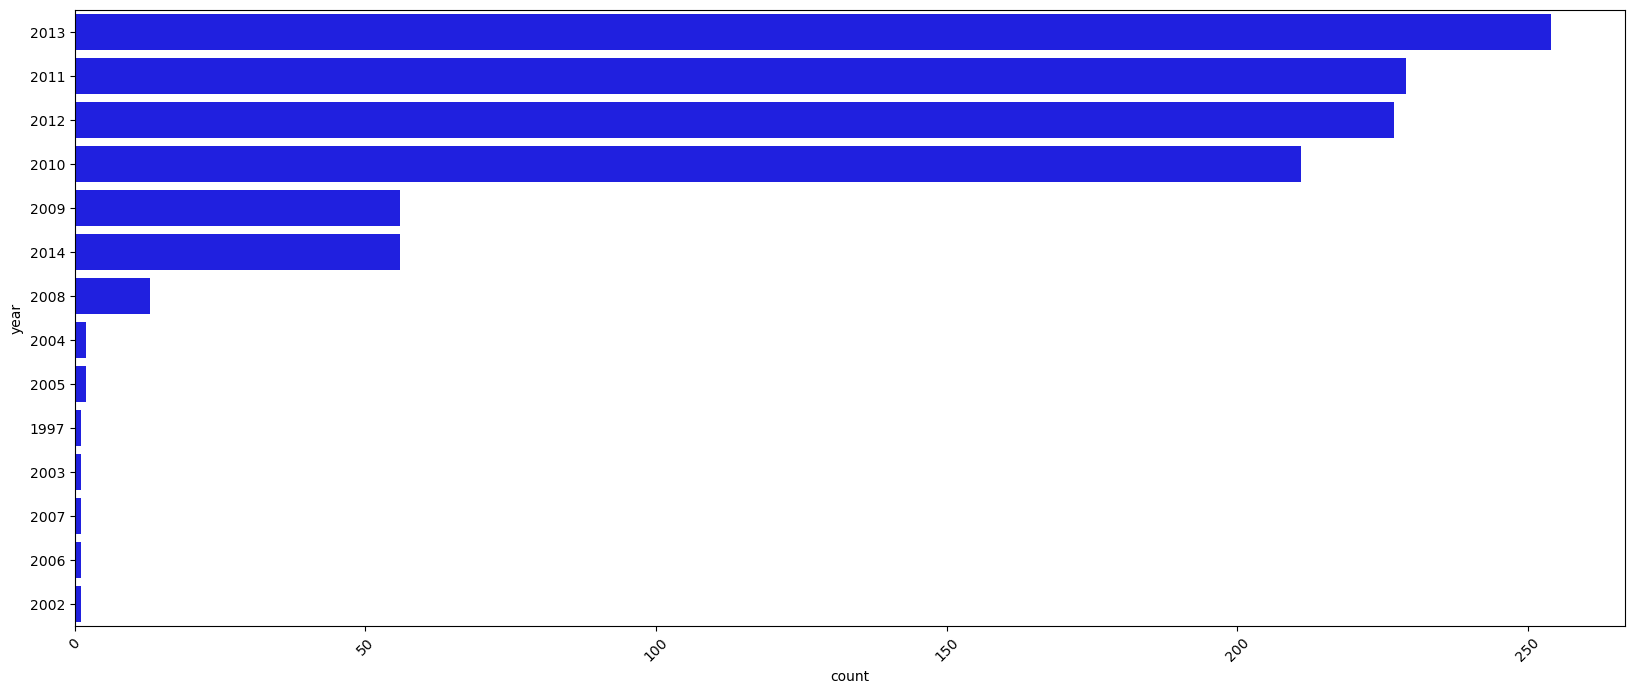

In [56]:
plt.figure(figsize=(20,8))
sb.countplot(data=df,y='year',color="blue",order=year_order)
plt.xticks(rotation=45);

### Based on the above plot we can notice that 2013 has the highest number of attacks. In the 2011 the number of attacks decrease. So every year we see that the number of breaches decreases, and this indicates that people's awareness increases and the development of technology and security policies increases significantly. Perhaps there are other factors that have led to a decrease in penetrations every year.

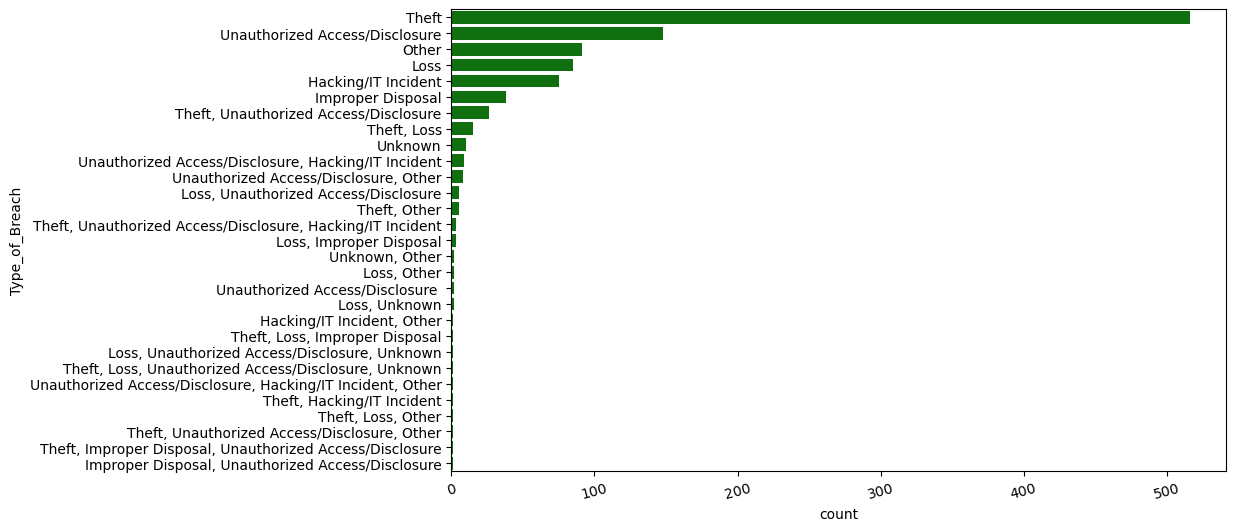

In [48]:
plt.figure(figsize=(10,6))
sb.countplot(data=df,y='Type_of_Breach',color="green",order=attack_order)
plt.xticks(rotation=15);

### Based on the above plot we can notice that theft is the most common attack which is occured 500 times in this dataset. Also, we can notice that Unauthorized Access/Disclosure comes in second place after theft. The other types of Breach occur, but in a small number.

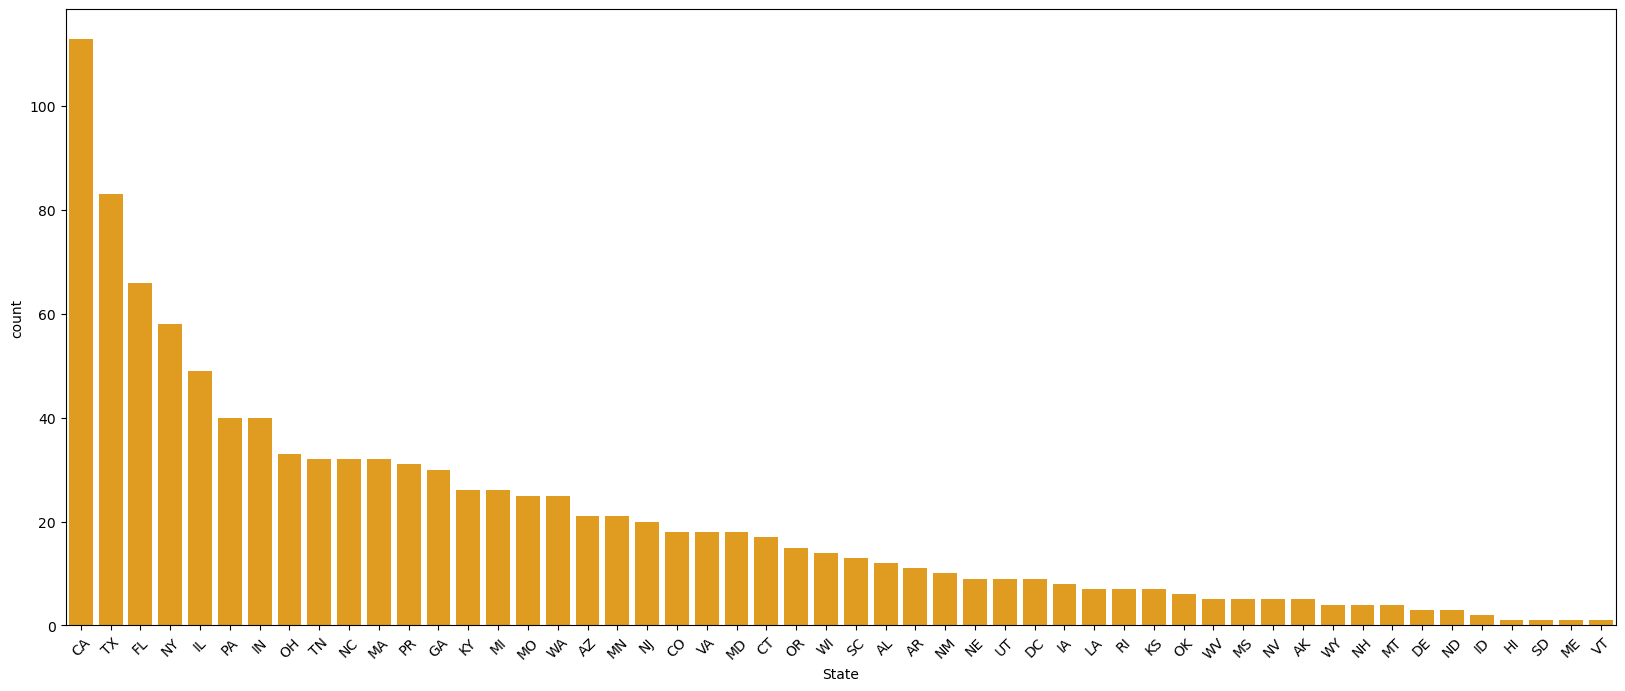

In [55]:
plt.figure(figsize=(20,8))
sb.countplot(data=df,x='State',color="orange",order=state_order)
plt.xticks(rotation=45);

### From the above plot we can see that California is the most reported cyber-attack state.

In [40]:
ct_counts = df.groupby(['Type_of_Breach', 'year']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index = 'Type_of_Breach', columns = 'year', values = 'count')
ct_counts.head()

year,1997,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Type_of_Breach,,,,,,,,,,,,,,
Hacking/IT Incident,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,3.0,9.0,17.0,15.0,19.0,9.0
"Hacking/IT Incident, Other",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Improper Disposal,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,11.0,5.0,9.0,11.0,NaN
"Improper Disposal, Unauthorized Access/Disclosure",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Loss,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,18.0,18.0,18.0,24.0,5.0


### The above table show the types of breach in each year and the how many times the breach occur. 

# 3. Prepare Data


## a) Data Cleaning


## b) Feature Selection


## c) Data Transforms